In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
gold_data = pd.read_csv("C:/Users/HP/Desktop/sarfan/gld_price_data - Copy.csv")
gold_data


,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [6]:
gold_data.head(5)

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.tail(5)

,SPX,GLD,USO,SLV,EUR/USD
2285,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
gold_data.shape

(2290, 5)

In [9]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [10]:
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
correlation = gold_data.corr()

<Axes: >

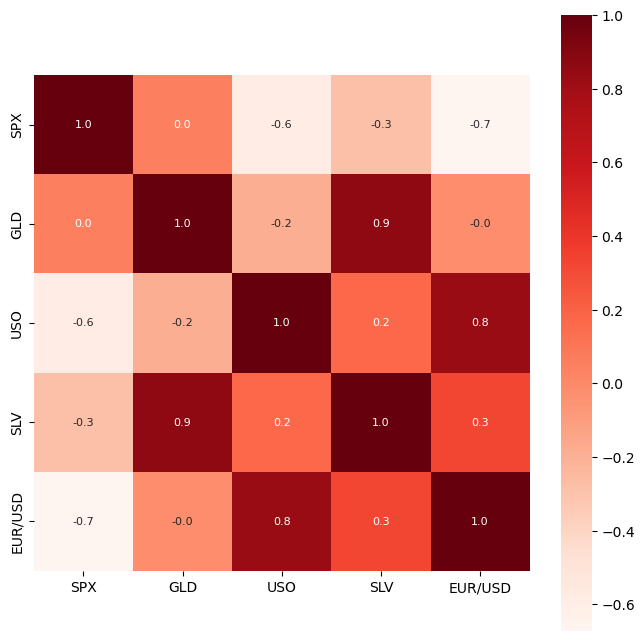

In [13]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap='Reds')

In [14]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

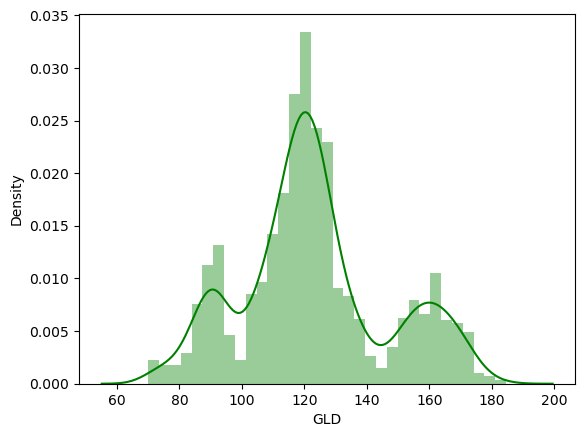

In [15]:
sns.distplot(gold_data['GLD'],color='green')


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = gold_data.drop(['GLD'],axis=1)
y = gold_data['GLD']

In [18]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=2)

In [20]:
regressor = RandomForestRegressor(n_estimators=100)

In [21]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
test_data_prediction = regressor.predict(x_test)

In [23]:
print(test_data_prediction)

[168.59079905  81.94819978 116.15080031 127.63970088 120.61350092
 154.61189724 150.5634991  126.16780021 117.57529875 126.16700033
 116.49580113 171.20270067 141.87809892 167.89299819 115.19539981
 117.37400027 138.01580391 170.21750068 158.87070318 159.43339965
 155.14700051 125.29110011 175.82429974 156.97700336 125.20770062
  93.80699925  77.9173004  120.5490998  119.15179994 167.5203001
  88.37619993 125.16760014  91.25500095 117.76510005 121.03389884
 135.85260105 115.35710139 114.68230084 146.98879943 107.40880078
 103.98960273  87.14539789 126.54790045 117.97159989 152.86659836
 119.56990018 108.40569976 108.14479823  93.23150046 127.18249757
  74.69920064 113.73679944 121.35029998 111.37809934 118.9643988
 121.05039922 160.05890021 167.18690201 146.95989654  85.86969857
  94.26860021  86.86489861  90.67750014 118.86730074 126.39580084
 127.69369988 168.07379969 122.23569915 117.47459869  98.40340055
 168.4615009  142.85219826 131.8155024  121.1165022  121.57179908
 119.6646006

In [24]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9891000166633936


In [25]:
y_test=list(y_test)

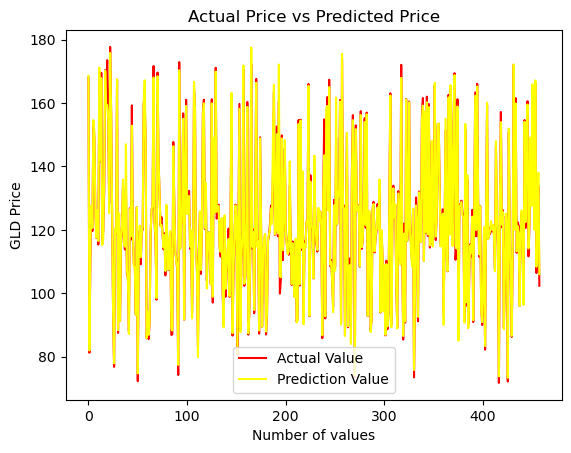

array([85.506499])

In [26]:
plt.plot(y_test,color='red',label='Actual Value')
plt.plot(test_data_prediction, color='yellow',label='Prediction Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

regressor.predict([[1411.630005,77.309998,15.285,1.475492]])

In [27]:
import pickle

In [28]:

with open('model.pkl','wb') as file:
    pickle.dump(regressor,file)